In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch
import pandas as pd

In [2]:
data = pd.read_csv('MLP_regresion.csv')

In [3]:
data.head()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


Revisamos el tamaño de cada uno.

In [4]:
np.shape(data['X']), np.shape(data['Y'])

((1000,), (1000,))

In [5]:
x = data['X']
y = data['Y']

x = x.values
y = y.values

In [6]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


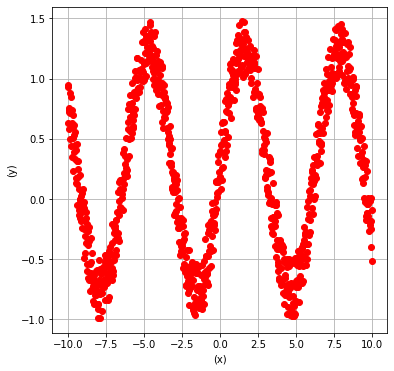

In [7]:
fig = plt.figure(figsize =(6,6))
plt.plot(x,y,'o', c='red')
plt.xlabel('(x)')
plt.ylabel('(y)')
plt.grid()
plt.show()

MODELO BASE (NO DESEADO):

Tomando inicialmente el esquema propuesto para el problema de regresión visto en clase, el ajuste fue poco efectivo obteniendo un comportamiento no deseado. Es decir, haciendo uso de 2 capas de 10 neuronas. Este comportamiento NO DESEADO se muestra a continuación.

Hacemos la conversión a tensores.

In [8]:
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)

Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

Modelo base

In [9]:
input_dim=1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,input_dim)
)
model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
criterion = torch.nn.MSELoss()

Epoch [1/201], loss: 2.138046979904175


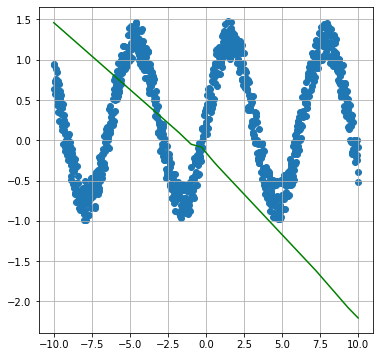

Epoch [51/201], loss: nan


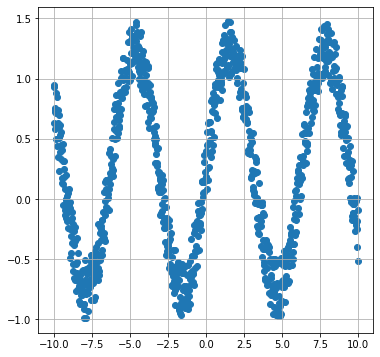

Epoch [101/201], loss: nan


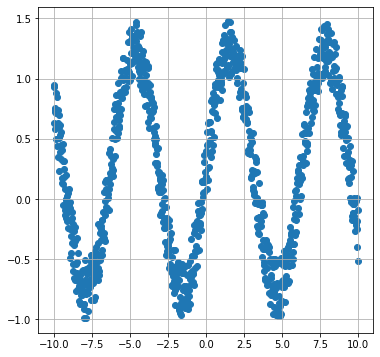

Epoch [151/201], loss: nan


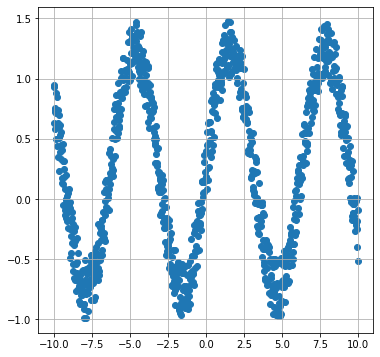

Epoch [201/201], loss: nan


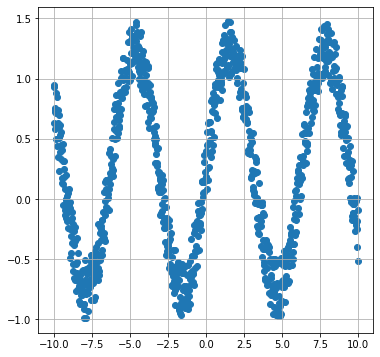

In [11]:
n_epoch=201
loss_list = []

for epoch in range(n_epoch):
  Y_pred = model(X)
  loss = criterion(Y_pred,Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch%50 == 0):
    print('Epoch [{}/{}], loss: {}'.format(epoch+1,n_epoch,loss.item()))

    fig = plt.figure(figsize=(6,6))
    plt.scatter(X.data.numpy(),Y.data.numpy())
    plt.plot(X.data.numpy(),Y_pred.data.numpy(),'g-')
    plt.grid()
    plt.show()

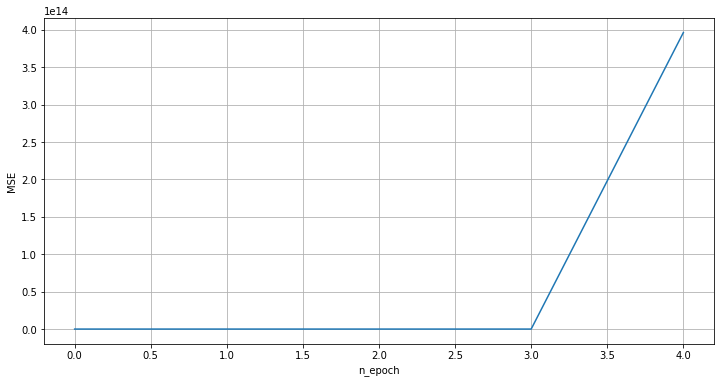

In [12]:
fig  = plt.figure(figsize = (12,6))
plt.plot(loss_list)
plt.xlabel('n_epoch')
plt.ylabel('MSE')
plt.grid()
plt.show()

MODELO ÓPTIMO 1 

Hacemos la conversión a tensores

In [409]:
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)

Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

Modelo

In [410]:
input_dim=1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,200),
    torch.nn.ReLU(),
    torch.nn.Linear(200,220),
    torch.nn.ReLU(),
    torch.nn.Linear(220,180),
    torch.nn.ReLU(),
    torch.nn.Linear(180,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,input_dim)
)

In [411]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
criterion = torch.nn.MSELoss()

Epoch [1/1551], loss: 0.500542163848877


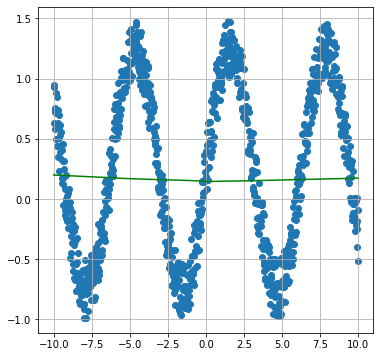

Epoch [51/1551], loss: 0.4581162631511688


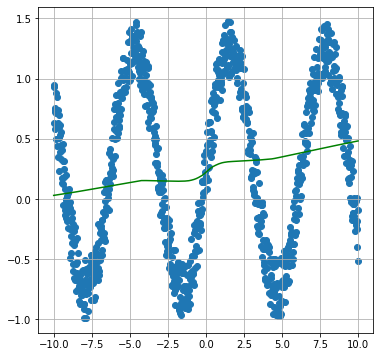

Epoch [101/1551], loss: 0.4230172336101532


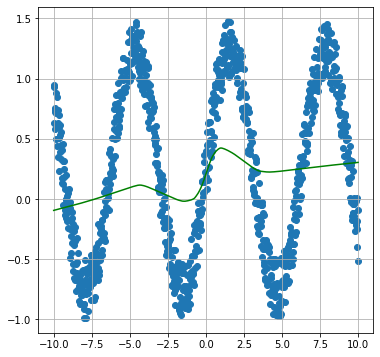

Epoch [151/1551], loss: 0.33799996972084045


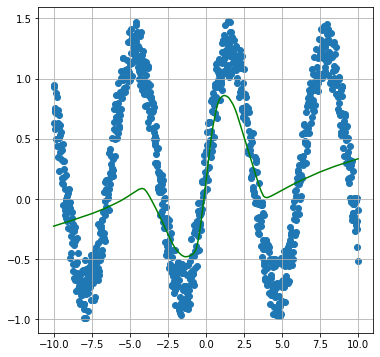

Epoch [201/1551], loss: 0.30900731682777405


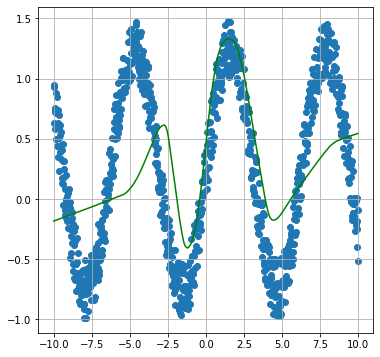

Epoch [251/1551], loss: 0.24262835085391998


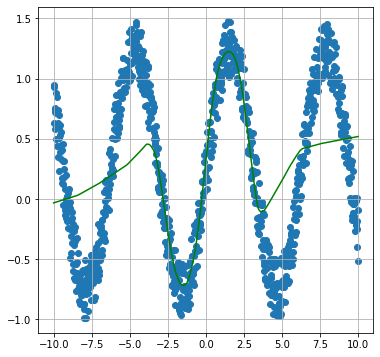

Epoch [301/1551], loss: 0.23252108693122864


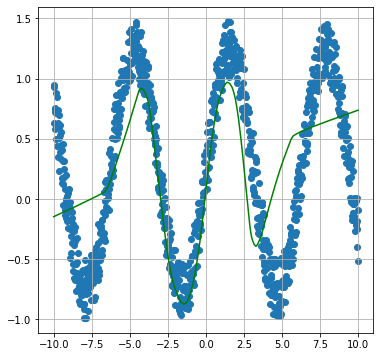

Epoch [351/1551], loss: 0.22603768110275269


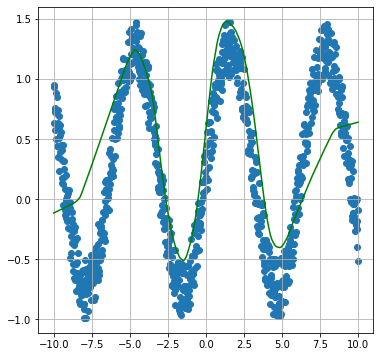

Epoch [401/1551], loss: 0.19943706691265106


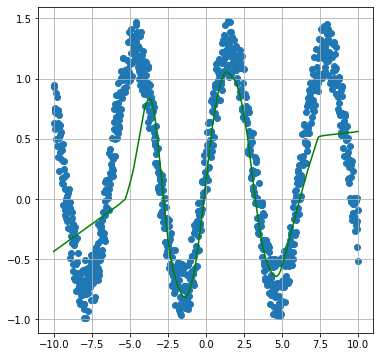

Epoch [451/1551], loss: 0.141965851187706


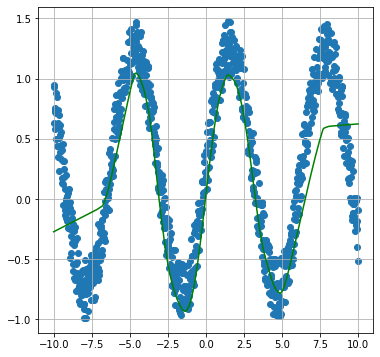

Epoch [501/1551], loss: 0.1649903506040573


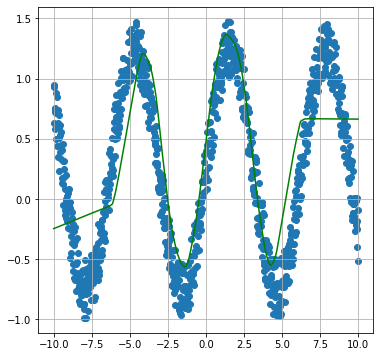

Epoch [551/1551], loss: 0.14057080447673798


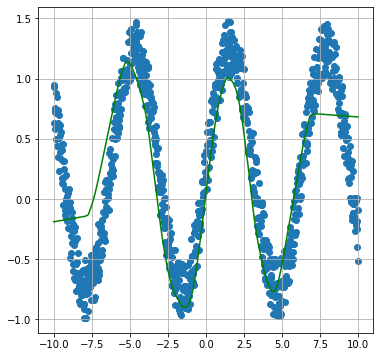

Epoch [601/1551], loss: 0.15168817341327667


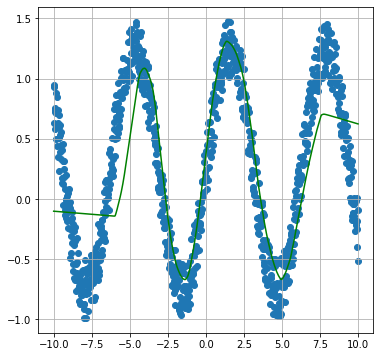

Epoch [651/1551], loss: 0.13635702431201935


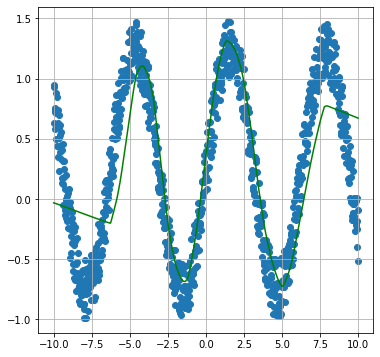

Epoch [701/1551], loss: 0.12354657053947449


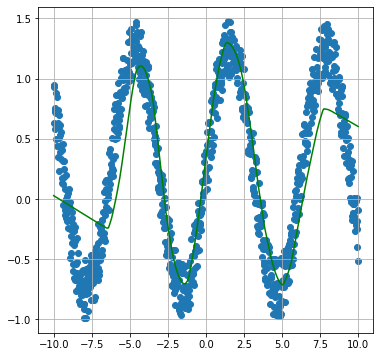

Epoch [751/1551], loss: 0.13627739250659943


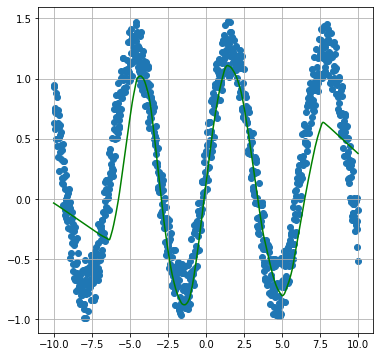

Epoch [801/1551], loss: 0.12078294157981873


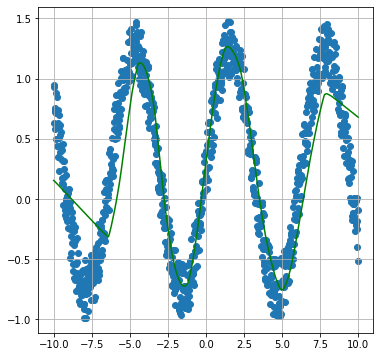

Epoch [851/1551], loss: 0.11187737435102463


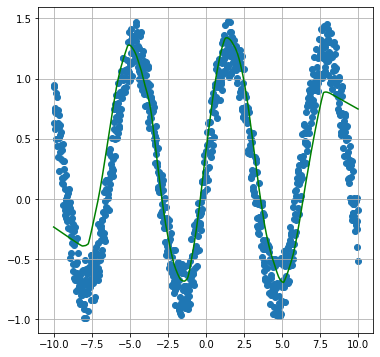

Epoch [901/1551], loss: 0.10452299565076828


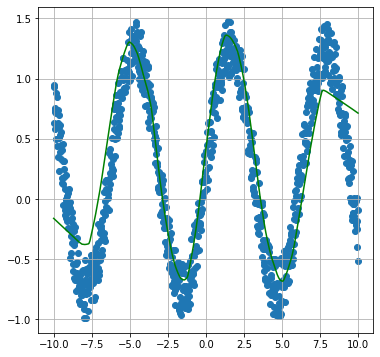

Epoch [951/1551], loss: 0.11524594575166702


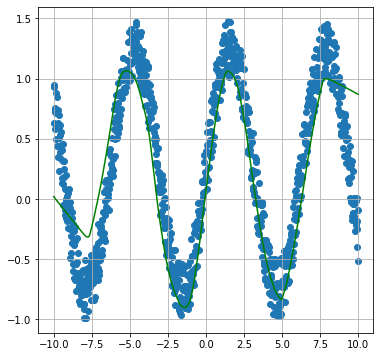

Epoch [1001/1551], loss: 0.10397138446569443


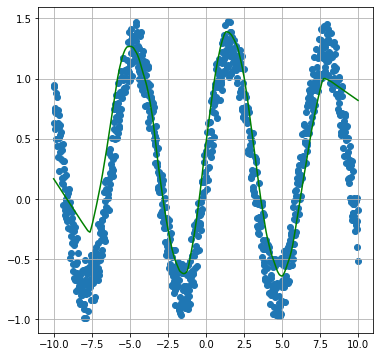

Epoch [1051/1551], loss: 0.11100100725889206


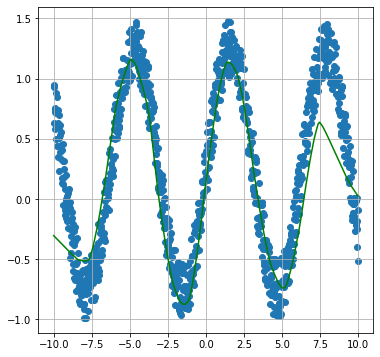

Epoch [1101/1551], loss: 0.09400027245283127


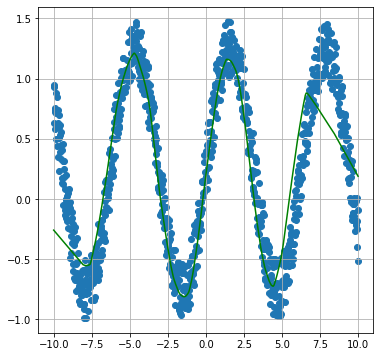

Epoch [1151/1551], loss: 0.0956728458404541


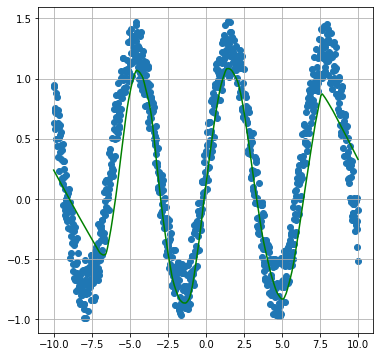

Epoch [1201/1551], loss: 0.08539408445358276


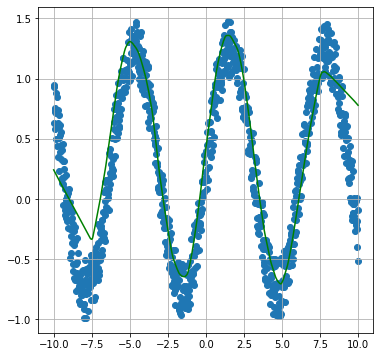

Epoch [1251/1551], loss: 0.08085249364376068


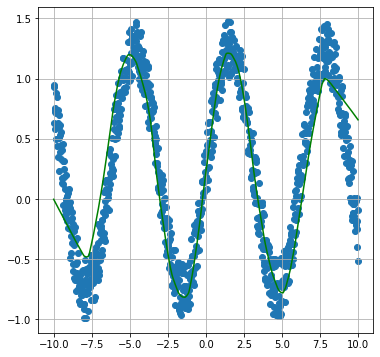

Epoch [1301/1551], loss: 0.09099666029214859


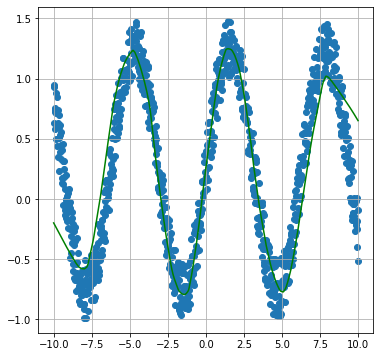

Epoch [1351/1551], loss: 0.10153606534004211


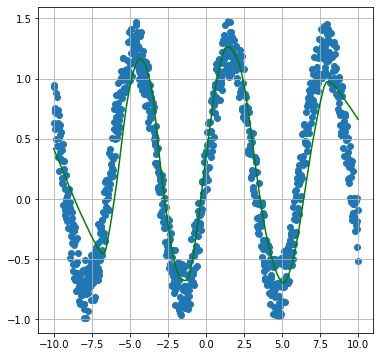

Epoch [1401/1551], loss: 0.08306082338094711


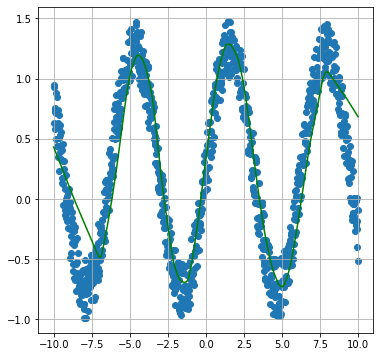

Epoch [1451/1551], loss: 0.10512986779212952


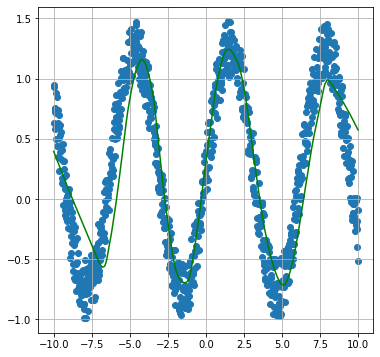

Epoch [1501/1551], loss: 0.08238556981086731


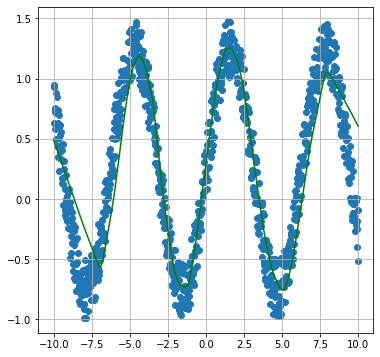

Epoch [1551/1551], loss: 0.08321559429168701


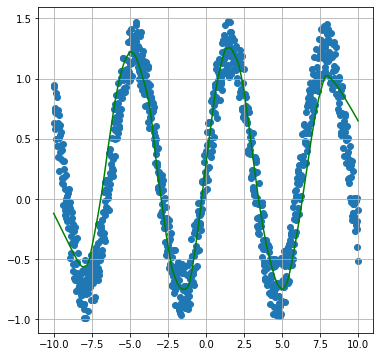

In [412]:
n_epoch=1551
loss_list = []

for epoch in range(n_epoch):
  Y_pred = model(X)
  loss = criterion(Y_pred,Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch%50 == 0):
    print('Epoch [{}/{}], loss: {}'.format(epoch+1,n_epoch,loss.item()))

    fig = plt.figure(figsize=(6,6))
    plt.scatter(X.data.numpy(),Y.data.numpy())
    plt.plot(X.data.numpy(),Y_pred.data.numpy(),'g-')
    plt.grid()
    plt.show()

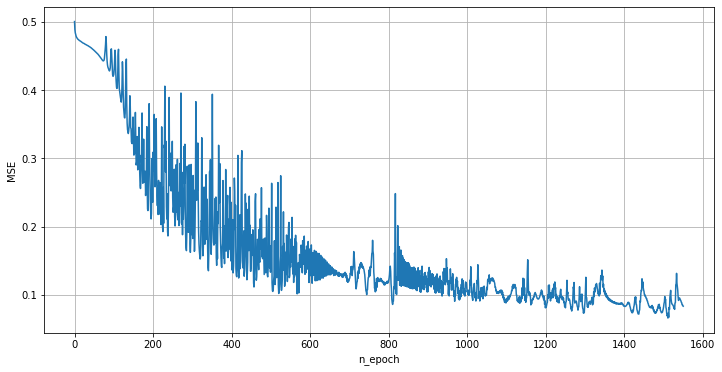

In [413]:
fig  = plt.figure(figsize = (12,6))
plt.plot(loss_list)
plt.xlabel('n_epoch')
plt.ylabel('MSE')
plt.grid()
plt.show()

Por lo cual, podemos decir que el modelo óptimo anteriormente encontrado es uno en el cual se dejó la tasa de aprendizaje constante, se aumentó las épocas a 1551 y el cual consta de 6 capas, pasando a 100 neuronas, luego a 200, luego a 220 y al final, disminuyendo a 180, 50 y la base. Se llegó a esta configuración teniendo en cuenta que al aumentar levemente las capas y agregar neuronas, se llegaba a un valor de loss entre 0.3 y 0.5, por lo cual se decidió aumentar el número de capas y el número de neuronas. Los valores específicos de las neuronas y las épocas se obtuvieron haciendo la iteración de forma manual hasta obtener el valor de loss requerido. Es decir, un loss menor a 0.1, el cual indicaría un modelo óptimo. 

MODELO ÓPTIMO 2

Hacemos la conversión a tensores

In [427]:
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)

Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

Modelo

In [428]:
input_dim=1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,120),
    torch.nn.ReLU(),
    torch.nn.Linear(120,200),
    torch.nn.ReLU(),
    torch.nn.Linear(200,220),
    torch.nn.ReLU(),
    torch.nn.Linear(220,200),
    torch.nn.ReLU(),
    torch.nn.Linear(200,input_dim)
)

In [429]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
criterion = torch.nn.MSELoss()

Epoch [1/2051], loss: 0.5101025104522705


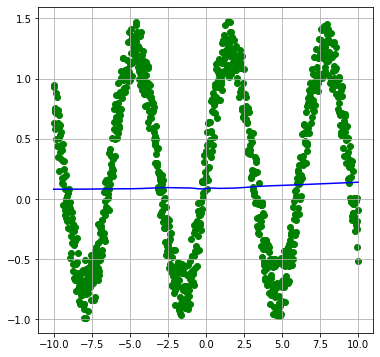

Epoch [51/2051], loss: 0.41071197390556335


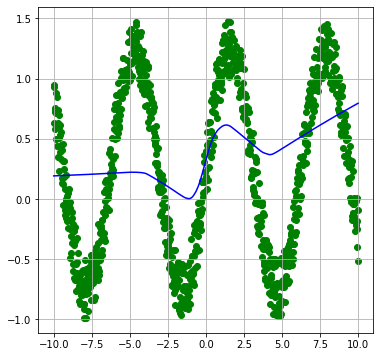

Epoch [101/2051], loss: 0.30705443024635315


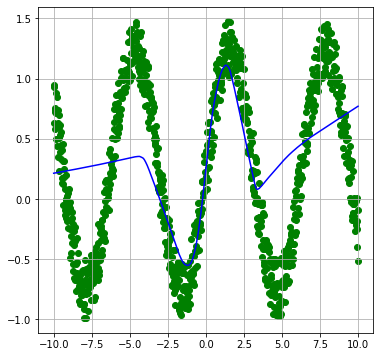

Epoch [151/2051], loss: 0.28933021426200867


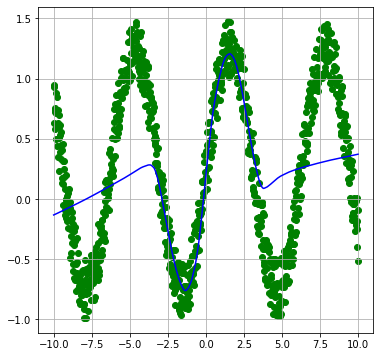

Epoch [201/2051], loss: 0.259392112493515


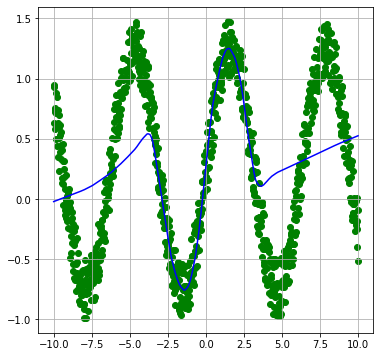

Epoch [251/2051], loss: 0.3286760449409485


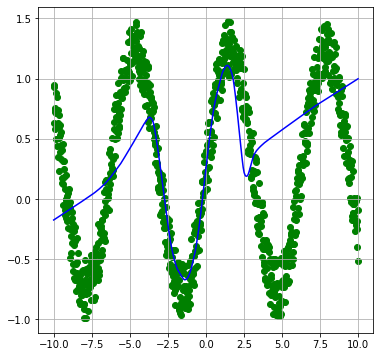

Epoch [301/2051], loss: 0.17604877054691315


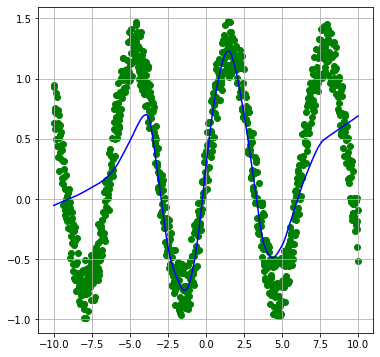

Epoch [351/2051], loss: 0.24207650125026703


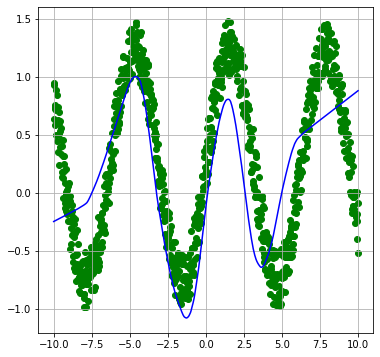

Epoch [401/2051], loss: 0.19641800224781036


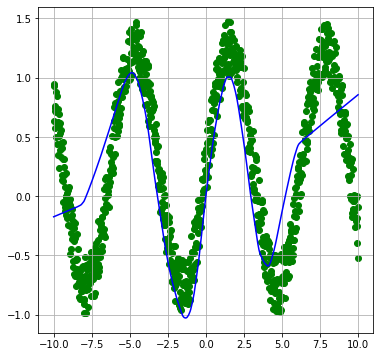

Epoch [451/2051], loss: 0.16096197068691254


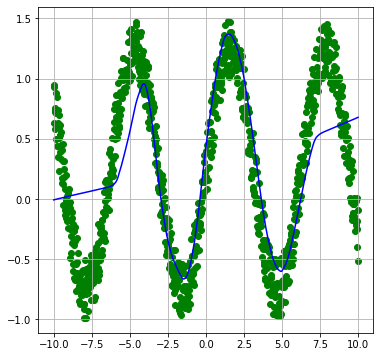

Epoch [501/2051], loss: 0.12954045832157135


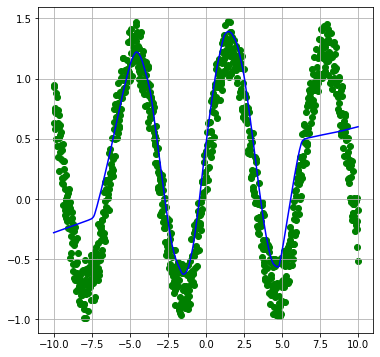

Epoch [551/2051], loss: 0.13328732550144196


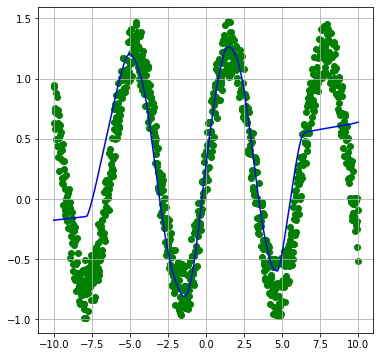

Epoch [601/2051], loss: 0.1616096943616867


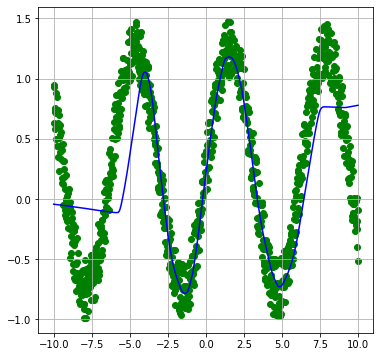

Epoch [651/2051], loss: 0.12147174775600433


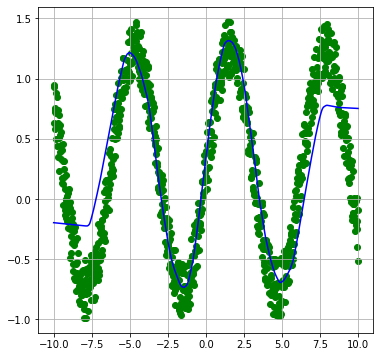

Epoch [701/2051], loss: 0.13150274753570557


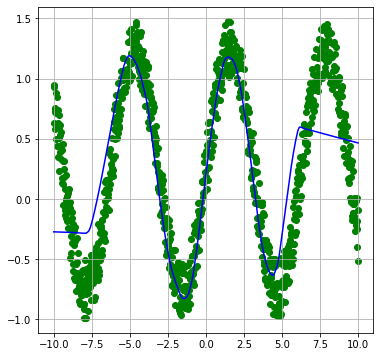

Epoch [751/2051], loss: 0.1385180801153183


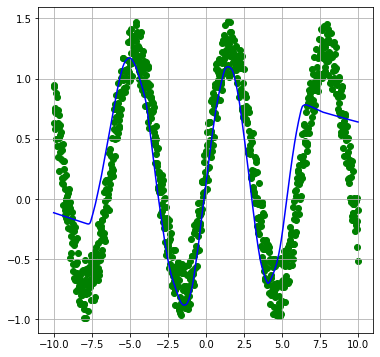

Epoch [801/2051], loss: 0.10667514055967331


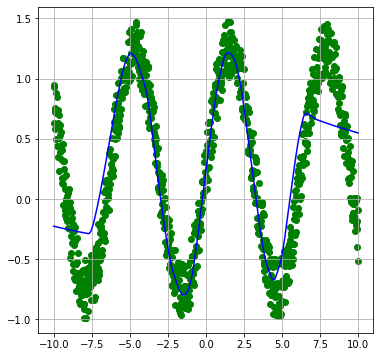

Epoch [851/2051], loss: 0.10414134711027145


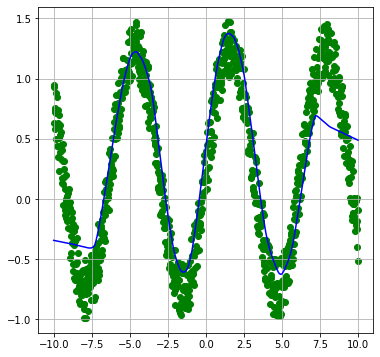

Epoch [901/2051], loss: 0.14211510121822357


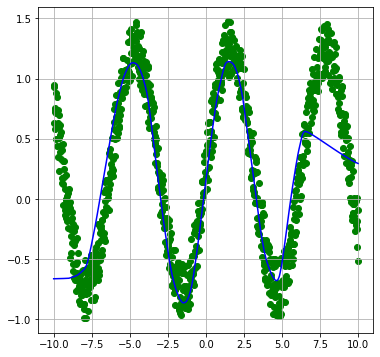

Epoch [951/2051], loss: 0.12579745054244995


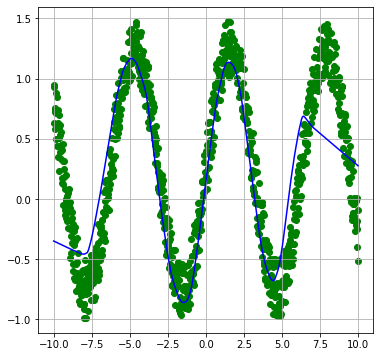

Epoch [1001/2051], loss: 0.07870327681303024


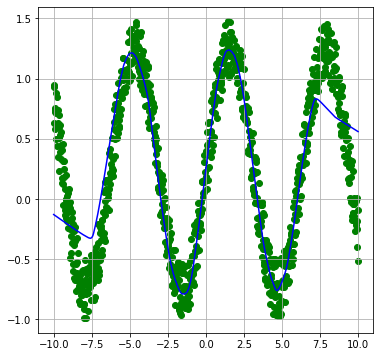

Epoch [1051/2051], loss: 0.1296529918909073


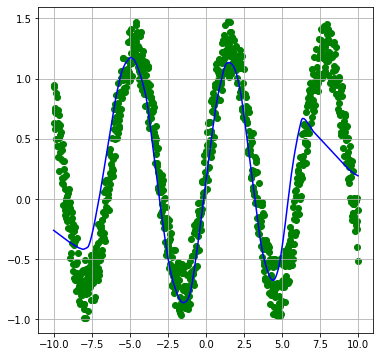

Epoch [1101/2051], loss: 0.07103218883275986


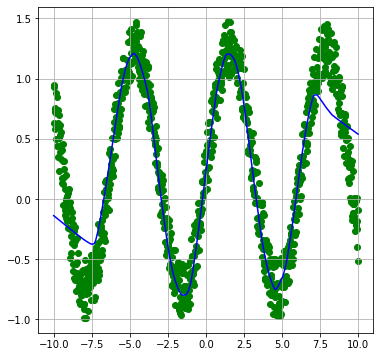

Epoch [1151/2051], loss: 0.10036787390708923


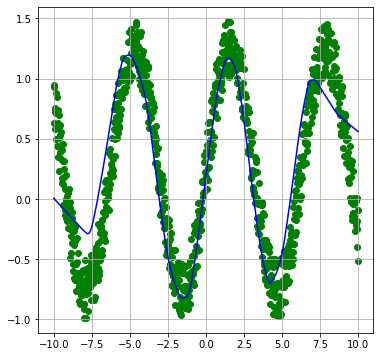

Epoch [1201/2051], loss: 0.08822038024663925


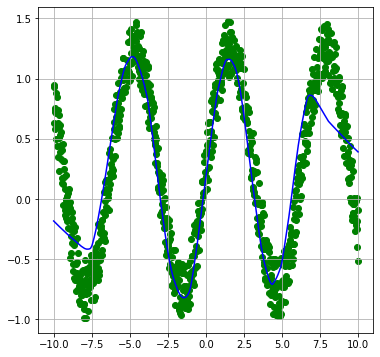

Epoch [1251/2051], loss: 0.14814303815364838


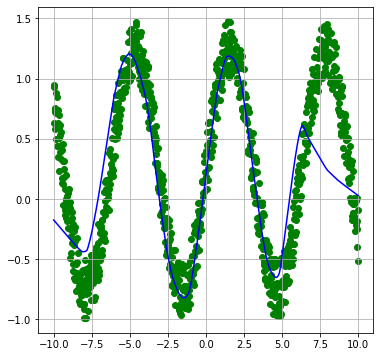

Epoch [1301/2051], loss: 0.1488381028175354


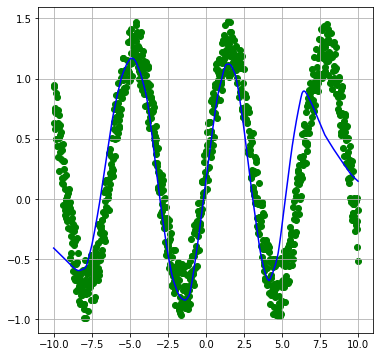

Epoch [1351/2051], loss: 0.10733010619878769


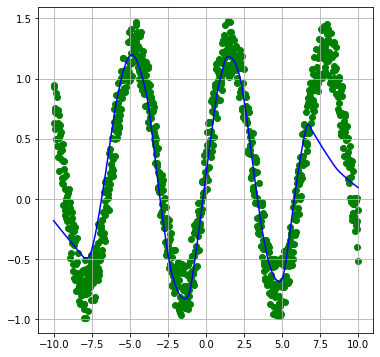

Epoch [1401/2051], loss: 0.12551090121269226


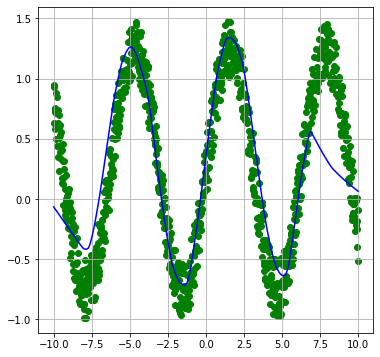

Epoch [1451/2051], loss: 0.09012099355459213


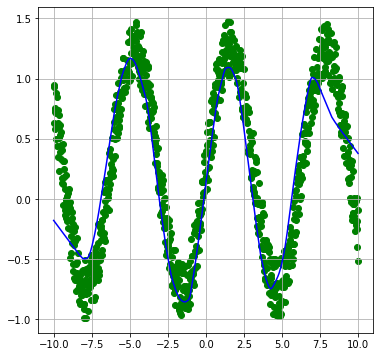

Epoch [1501/2051], loss: 0.09977404028177261


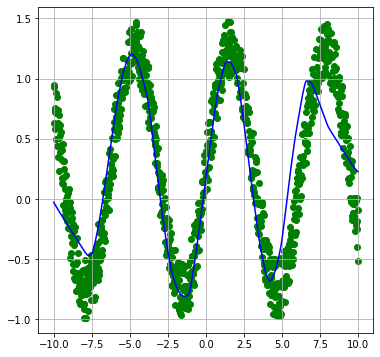

Epoch [1551/2051], loss: 0.09194567054510117


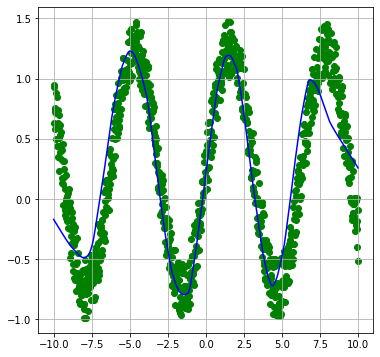

Epoch [1601/2051], loss: 0.0948786810040474


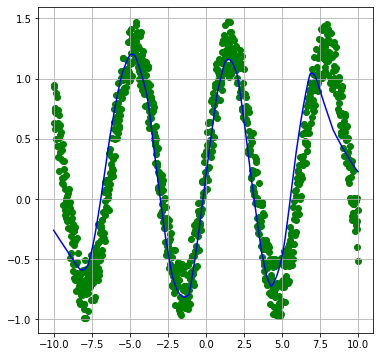

Epoch [1651/2051], loss: 0.12485359609127045


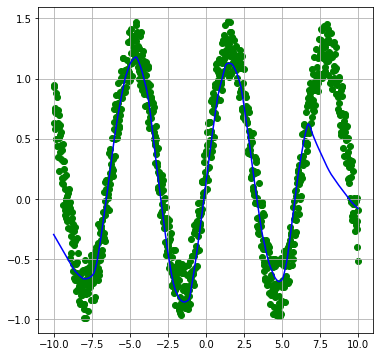

Epoch [1701/2051], loss: 0.06940291821956635


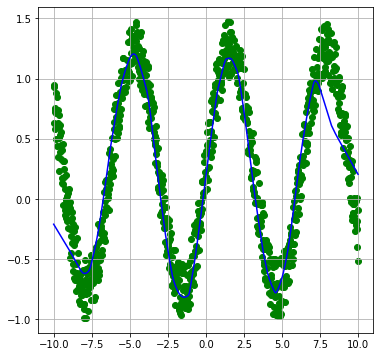

Epoch [1751/2051], loss: 0.08848872780799866


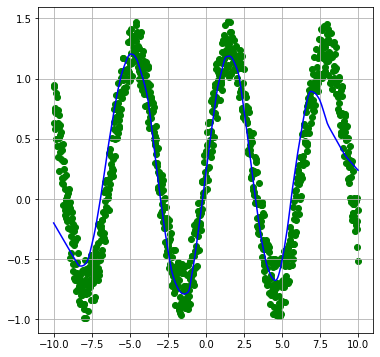

Epoch [1801/2051], loss: 0.0533301942050457


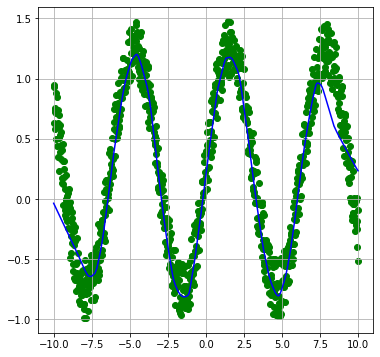

Epoch [1851/2051], loss: 0.09891524910926819


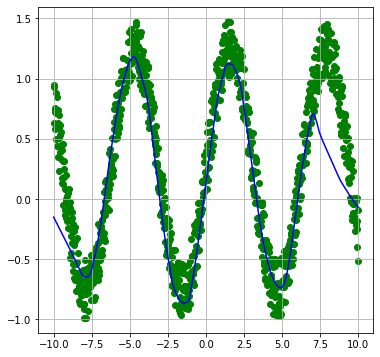

Epoch [1901/2051], loss: 0.07340706884860992


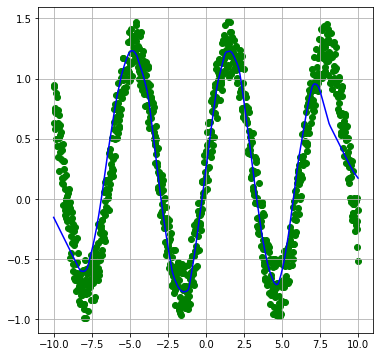

Epoch [1951/2051], loss: 0.10351503640413284


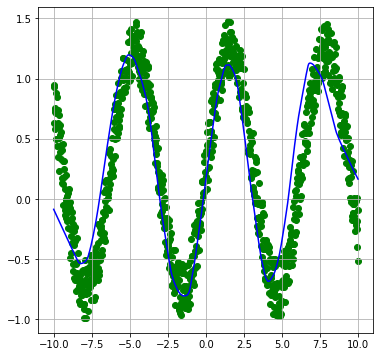

Epoch [2001/2051], loss: 0.06475536525249481


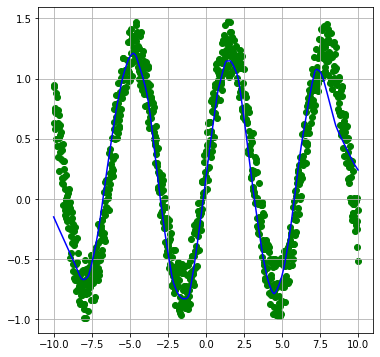

Epoch [2051/2051], loss: 0.08656691759824753


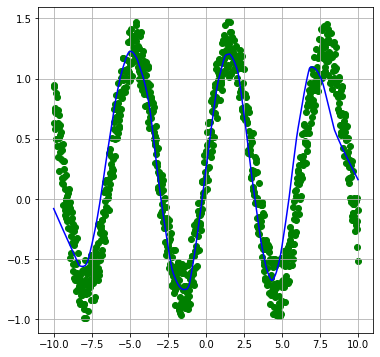

In [430]:
n_epoch=2051
loss_list = []

for epoch in range(n_epoch):
  Y_pred = model(X)
  loss = criterion(Y_pred,Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch%50 == 0):
    print('Epoch [{}/{}], loss: {}'.format(epoch+1,n_epoch,loss.item()))

    fig = plt.figure(figsize=(6,6))
    plt.scatter(X.data.numpy(),Y.data.numpy(), c= 'green')
    plt.plot(X.data.numpy(),Y_pred.data.numpy(),'b-')
    plt.grid()
    plt.show()

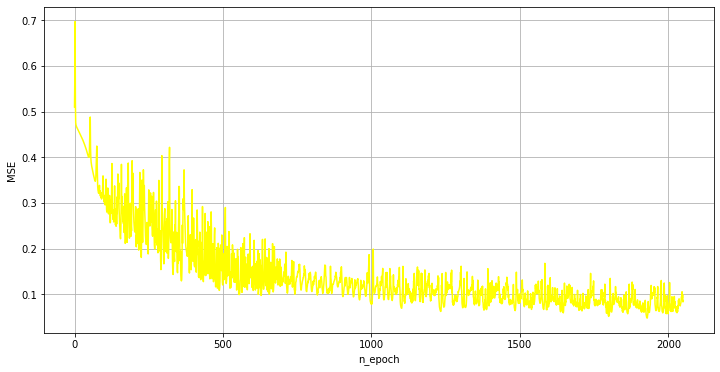

In [432]:
fig  = plt.figure(figsize = (12,6))
plt.plot(loss_list , c ='yellow')
plt.xlabel('n_epoch')
plt.ylabel('MSE')
plt.grid()
plt.show()

En este caso, se dejó nuevamente una tasa de aprendizaje constante, pero como se solicitaba que la diferencia de los modelos estuiera en el número de capas y neuronas, se disminuyó en una la cantidad de capas y se aumentó el número de neuronas. Inicialmente, no se obtuvo resultados adecuados manteniendo el número de épocas del caso anterior, por lo que fue necesario aumentarlas para obtener un loss adecuado. Para este caso, se obtuvo un loss de 0.086 lo cual indica que es un modelo adecuado. 

Principalmente, se puede decir que los resultados arrojados por los dos modelos son similares teniendo en cuenta los valores de loss para cada uno; los cuales fueron de 0.083 y 0.086, respectivamente. Ahora, no se puede decir que lo que afecta significativamente son las épocas ya que hubo un incremento de 500 entre ambos modelos y el loss es muy similar. Sin embargo, lo que sí se puede afirmar es que se requirió un mayor número de épocas para llegar a un resultado similar porque se eliminó una capa en el segundo modelo y se tuvo un aumento en el número de neuronas por capa. Según los resultados obtenidos, se podría decir que se obtuvo ese comportamiento similar debido al número de neuronas añadidas y al número de capas en cada modelo. 